In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import sys
sys.path.append('../Shared_dir')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import feature_engineering_scaling as fes

Simple ANN

In [5]:
#Simple MLP
def simple_model_ann (input_shape, output_shape):
    model= keras.Sequential(
        [
            keras.Input(shape=input_shape),
            layers.Flatten(),
            layers.Dense (256, activation = "relu"),
            layers.Dense (256, activation = "relu"),
            layers.Dense (output_shape, activation = "softmax"),
        
        ]
    )
    model.compile (loss="categorical_crossentropy", optimizer = "adam", metrics=['accuracy'])
    
    return model

In [6]:
#For the first radioactive chain i.e. BiPo 214
model1 = simple_model_ann(fes.X1_train.shape[1], fes.y1_train.shape[1])
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 flatten_2 (Flatten)         (None, 5)                 0         
                                                                 
 dense_6 (Dense)             (None, 256)               1536      
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dense_8 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 68356 (267.02 KB)
Trainable params: 68356 (267.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
#For the second radioactive chain i.e. BiPo 212
model2 = simple_model_ann(fes.X2_train.shape[1], fes.y2_train.shape[1])
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 5)                 0         
                                                                 
 dense_9 (Dense)             (None, 256)               1536      
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dense_11 (Dense)            (None, 6)                 1542      
                                                                 
Total params: 68870 (269.02 KB)
Trainable params: 68870 (269.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
#Callback to decrease the learning rate and to stop early in case the loss hits a plateau
callbacks=[
    keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=4, verbose=1, min_lr=1E-6),
     keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
]

In [10]:
# Train the first model
history1 = model1.fit(fes.X1_train, fes.y1_train, epochs=200, batch_size=10000, verbose=2,
                      validation_data=(fes.X1_val, fes.y1_val),
                      callbacks=callbacks)

Epoch 1/200
554/554 - 80s - loss: 0.5911 - accuracy: 0.7543 - val_loss: 0.5003 - val_accuracy: 0.7843 - lr: 0.0010 - 80s/epoch - 145ms/step
Epoch 2/200
554/554 - 78s - loss: 0.4875 - accuracy: 0.7894 - val_loss: 0.4826 - val_accuracy: 0.7916 - lr: 0.0010 - 78s/epoch - 142ms/step
Epoch 3/200
554/554 - 78s - loss: 0.4808 - accuracy: 0.7921 - val_loss: 0.4826 - val_accuracy: 0.7912 - lr: 0.0010 - 78s/epoch - 142ms/step
Epoch 4/200
554/554 - 89s - loss: 0.4780 - accuracy: 0.7933 - val_loss: 0.4774 - val_accuracy: 0.7936 - lr: 0.0010 - 89s/epoch - 161ms/step
Epoch 5/200
554/554 - 90s - loss: 0.4765 - accuracy: 0.7939 - val_loss: 0.4770 - val_accuracy: 0.7937 - lr: 0.0010 - 90s/epoch - 163ms/step
Epoch 6/200
554/554 - 84s - loss: 0.4759 - accuracy: 0.7941 - val_loss: 0.4762 - val_accuracy: 0.7939 - lr: 0.0010 - 84s/epoch - 151ms/step
Epoch 7/200
554/554 - 85s - loss: 0.4755 - accuracy: 0.7943 - val_loss: 0.4761 - val_accuracy: 0.7938 - lr: 0.0010 - 85s/epoch - 153ms/step
Epoch 8/200
554/554 

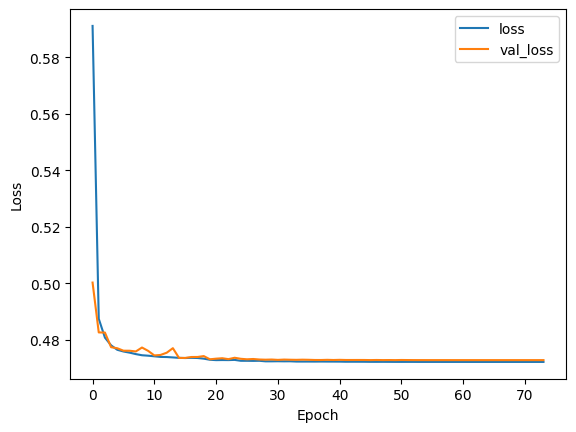

In [11]:
#Plot the loss over the number of epochs
plt.plot(history1.history['loss'], label='loss')
plt.plot(history1.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

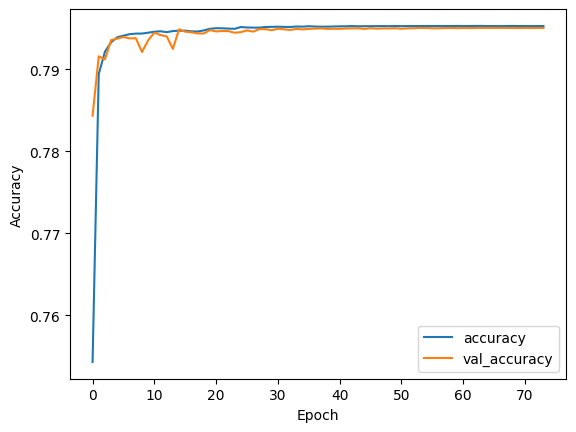

In [12]:
#Plot the accuracy over the number of epochs
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [13]:
# Predict the labels for the test set
y_pred1 = model1.predict(fes.X1_test)

# If using softmax, convert predictions to class labels
y_pred_classes1 = np.argmax(y_pred1, axis=1)

# Convert one-hot encoded true labels back to class labels
y_test_classes1 = np.argmax(fes.y1_test, axis=1)

54025/54025 [==============================] - 87s 2ms/step


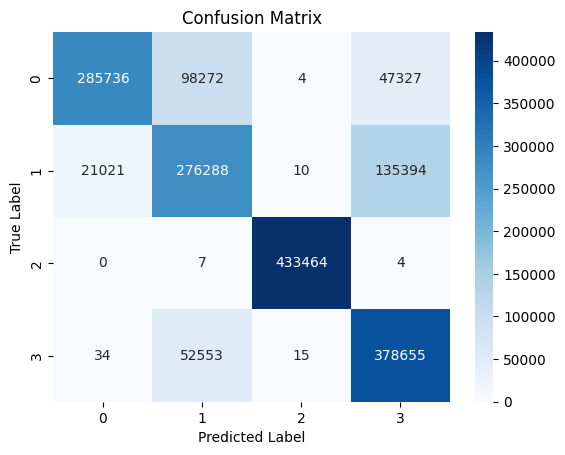

In [14]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Plot confusion matrix
conf_matrix1 = confusion_matrix(y_test_classes1, y_pred_classes1)
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculate metrics
precision_macro = precision_score(y_test_classes1, y_pred_classes1, average='macro')
recall_macro = recall_score(y_test_classes1, y_pred_classes1, average='macro')
f1_macro = f1_score(y_test_classes1, y_pred_classes1, average='macro')

precision_micro = precision_score(y_test_classes1, y_pred_classes1, average='micro')
recall_micro = recall_score(y_test_classes1, y_pred_classes1, average='micro')
f1_micro = f1_score(y_test_classes1, y_pred_classes1, average='micro')

precision_weighted = precision_score(y_test_classes1, y_pred_classes1, average='weighted')
recall_weighted = recall_score(y_test_classes1, y_pred_classes1, average='weighted')
f1_weighted = f1_score(y_test_classes1, y_pred_classes1, average='weighted')

# Create a summary table for F1, Recall, and Precision
metrics_summary = pd.DataFrame({
    'Metric': [
        'Precision (Macro)', 'Recall (Macro)', 'F1 Score (Macro)',
        'Precision (Micro)', 'Recall (Micro)', 'F1 Score (Micro)',
        'Precision (Weighted)', 'Recall (Weighted)', 'F1 Score (Weighted)'
    ],
    'Score': [
        precision_macro, recall_macro, f1_macro,
        precision_micro, recall_micro, f1_micro,
        precision_weighted, recall_weighted, f1_weighted
    ]
})

# Display the table
print(metrics_summary)

                 Metric     Score
0     Precision (Macro)  0.813168
1        Recall (Macro)  0.794736
2      F1 Score (Macro)  0.794938
3     Precision (Micro)  0.794861
4        Recall (Micro)  0.794861
5      F1 Score (Micro)  0.794861
6  Precision (Weighted)  0.813274
7     Recall (Weighted)  0.794861
8   F1 Score (Weighted)  0.795072


In [16]:
# Train the second model
history2 = model2.fit(fes.X2_train, fes.y2_train, epochs=200, batch_size=10000, verbose=2,
                      validation_data=(fes.X2_val, fes.y2_val),
                      callbacks=callbacks)

Epoch 1/200
548/548 - 63s - loss: 0.5937 - accuracy: 0.7607 - val_loss: 0.4880 - val_accuracy: 0.7961 - lr: 0.0010 - 63s/epoch - 114ms/step
Epoch 2/200
548/548 - 62s - loss: 0.4647 - accuracy: 0.8053 - val_loss: 0.4562 - val_accuracy: 0.8014 - lr: 0.0010 - 62s/epoch - 113ms/step
Epoch 3/200
548/548 - 61s - loss: 0.4449 - accuracy: 0.8125 - val_loss: 0.4450 - val_accuracy: 0.8090 - lr: 0.0010 - 61s/epoch - 111ms/step
Epoch 4/200
548/548 - 61s - loss: 0.4414 - accuracy: 0.8137 - val_loss: 0.4391 - val_accuracy: 0.8145 - lr: 0.0010 - 61s/epoch - 111ms/step
Epoch 5/200
548/548 - 61s - loss: 0.4405 - accuracy: 0.8137 - val_loss: 0.4385 - val_accuracy: 0.8142 - lr: 0.0010 - 61s/epoch - 111ms/step
Epoch 6/200
548/548 - 61s - loss: 0.4394 - accuracy: 0.8142 - val_loss: 0.4386 - val_accuracy: 0.8153 - lr: 0.0010 - 61s/epoch - 111ms/step
Epoch 7/200
548/548 - 61s - loss: 0.4383 - accuracy: 0.8148 - val_loss: 0.4378 - val_accuracy: 0.8139 - lr: 0.0010 - 61s/epoch - 112ms/step
Epoch 8/200
548/548 

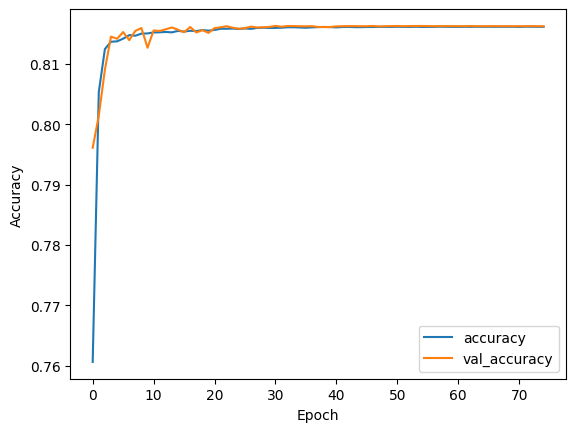

In [17]:
#Plot the loss over the number of epochs
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

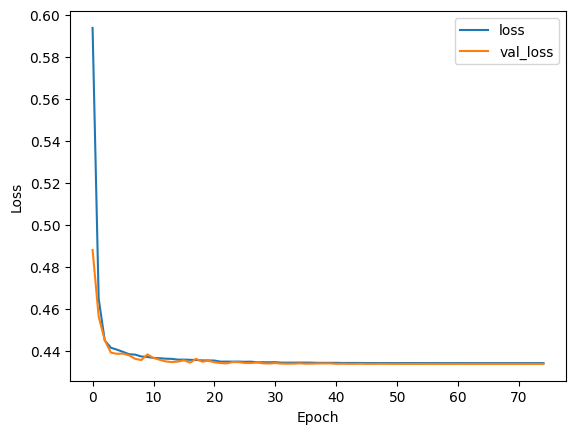

In [18]:
#Plot the accuracy over the number of epochs
plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [19]:
# Predict the labels for the test set
y_pred2 = model2.predict(fes.X2_test)

# If using softmax, convert predictions to class labels
y_pred_classes2 = np.argmax(y_pred2, axis=1)

# Convert one-hot encoded true labels back to class labels
y_test_classes2 = np.argmax(fes.y2_test, axis=1)

53464/53464 [==============================] - 87s 2ms/step


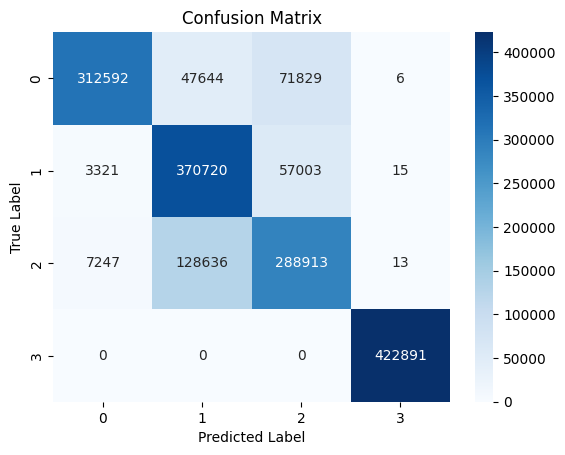

In [20]:
# Plot confusion matrix
conf_matrix2 = confusion_matrix(y_test_classes2, y_pred_classes2)
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [21]:
# Calculate metrics
precision_macro = precision_score(y_test_classes2, y_pred_classes2, average='macro')
recall_macro = recall_score(y_test_classes2, y_pred_classes2, average='macro')
f1_macro = f1_score(y_test_classes2, y_pred_classes2, average='macro')

precision_micro = precision_score(y_test_classes2, y_pred_classes2, average='micro')
recall_micro = recall_score(y_test_classes2, y_pred_classes2, average='micro')
f1_micro = f1_score(y_test_classes2, y_pred_classes2, average='micro')

precision_weighted = precision_score(y_test_classes2, y_pred_classes2, average='weighted')
recall_weighted = recall_score(y_test_classes2, y_pred_classes2, average='weighted')
f1_weighted = f1_score(y_test_classes2, y_pred_classes2, average='weighted')

# Create a summary table for F1, Recall, and Precision
metrics_summary = pd.DataFrame({
    'Metric': [
        'Precision (Macro)', 'Recall (Macro)', 'F1 Score (Macro)',
        'Precision (Micro)', 'Recall (Micro)', 'F1 Score (Micro)',
        'Precision (Weighted)', 'Recall (Weighted)', 'F1 Score (Weighted)'
    ],
    'Score': [
        precision_macro, recall_macro, f1_macro,
        precision_micro, recall_micro, f1_micro,
        precision_weighted, recall_weighted, f1_weighted
    ]
})

# Display the table
print(metrics_summary)

                 Metric     Score
0     Precision (Macro)  0.834138
1        Recall (Macro)  0.815899
2      F1 Score (Macro)  0.817910
3     Precision (Micro)  0.815462
4        Recall (Micro)  0.815462
5      F1 Score (Micro)  0.815462
6  Precision (Weighted)  0.833946
7     Recall (Weighted)  0.815462
8   F1 Score (Weighted)  0.817529


In [22]:
#Save the trained models
model1.save('model_ann_214.h5')

/home/pipc06/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
model2.save('model_ann_212.h5')